In [1]:
# Import libraries
import numpy as np
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Download latest version
path = kagglehub.dataset_download("sampadab17/network-intrusion-detection")

Using Colab cache for faster access to the 'network-intrusion-detection' dataset.


In [3]:
# Print dataset path
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/network-intrusion-detection


In [4]:
# List files in the downloaded directory
print(os.listdir(path))

['Train_data.csv', 'Test_data.csv']


In [5]:
# Load datasets
traindata = pd.read_csv(path + "/Train_data.csv")
testdata = pd.read_csv(path + "/Test_data.csv")

In [6]:
# Check dataset
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [7]:
# Print first 5 lines of data
traindata.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [8]:
# Print last 5 lines of data
traindata.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.0,0.0,0.0,0.0,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.0,1.0,0.0,0.0,anomaly
25191,0,tcp,finger,S0,0,0,0,0,0,0,...,49,0.19,0.03,0.01,0.00,1.0,1.0,0.0,0.0,anomaly


In [9]:
# Check for missing values
traindata.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [10]:
# Print Summary statistics of the train data
traindata.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Print the shape of the data
traindata.shape

(25192, 42)

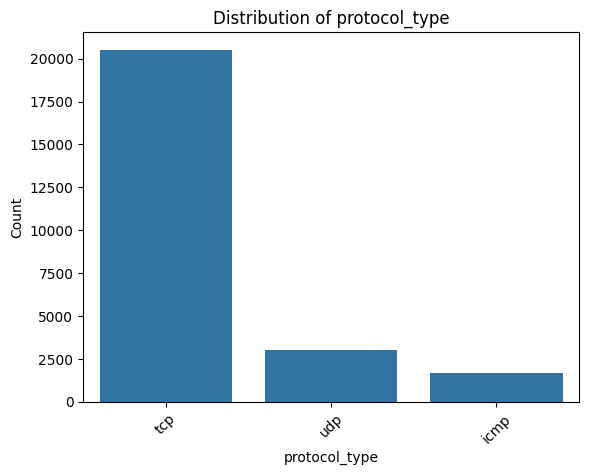

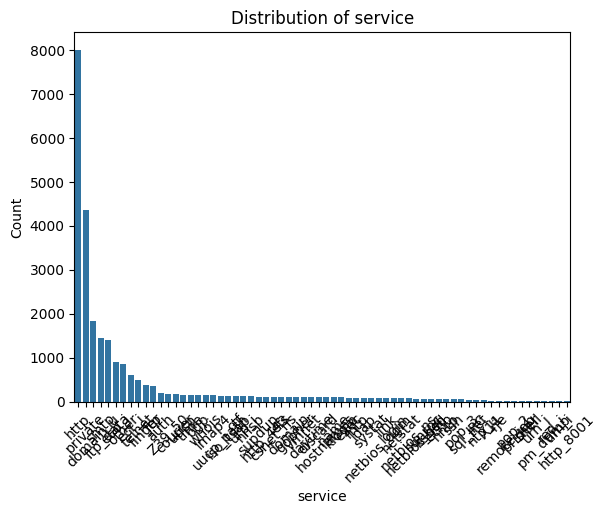

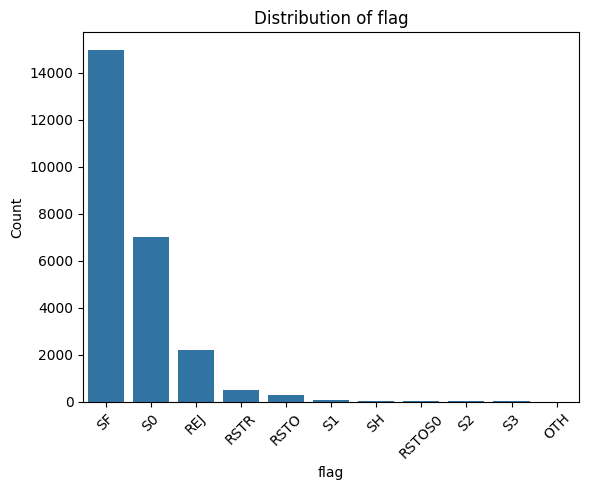

In [12]:
# Categorical Feature Distributions
categorical_features = ['protocol_type', 'service', 'flag']
for feature in categorical_features:
    sns.countplot(data=traindata, x=feature, order=traindata[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

/tmp/ipython-input-2585796780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=traindata, x='class', palette='Set2')


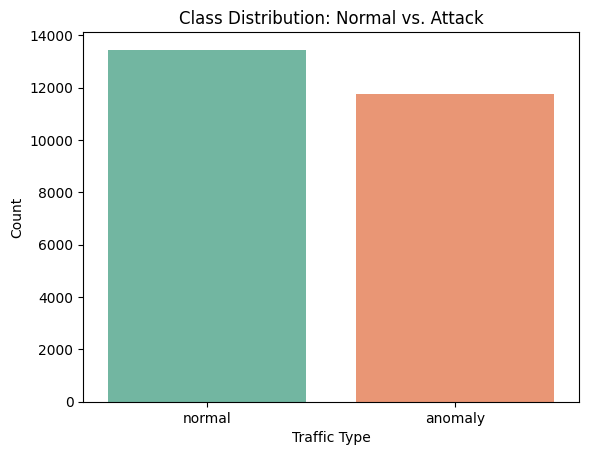

In [13]:
# Count plot for class distribution
sns.countplot(data=traindata, x='class', palette='Set2')
plt.title('Class Distribution: Normal vs. Attack')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.show()

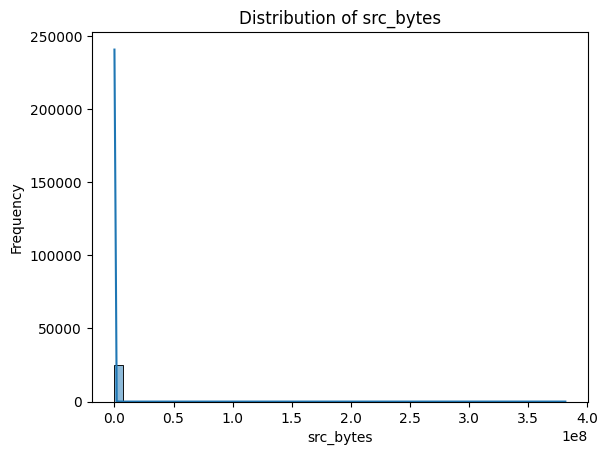

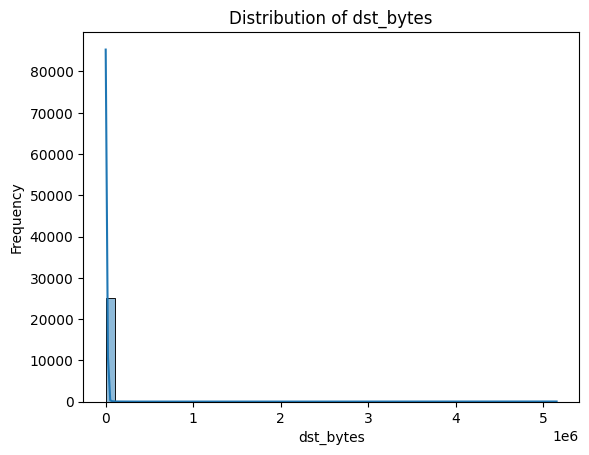

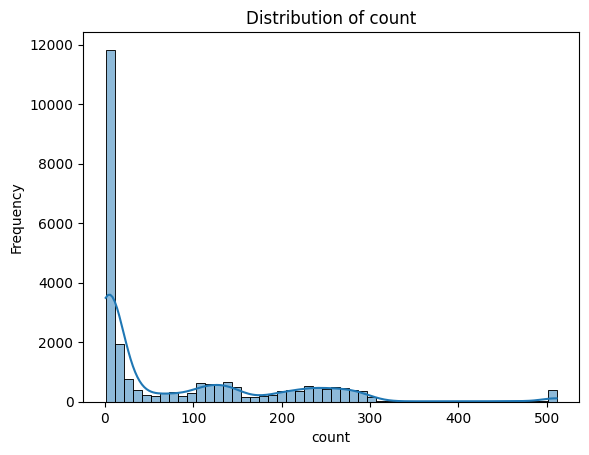

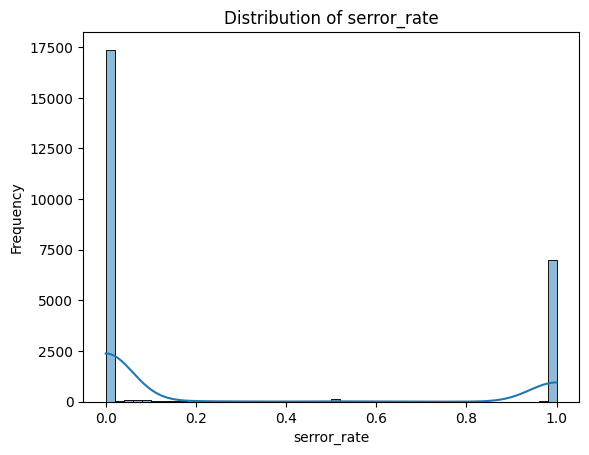

In [14]:
# Plot distributions
features_to_plot = ['src_bytes', 'dst_bytes', 'count', 'serror_rate']
for feature in features_to_plot:
    sns.histplot(data=traindata, x=feature, bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

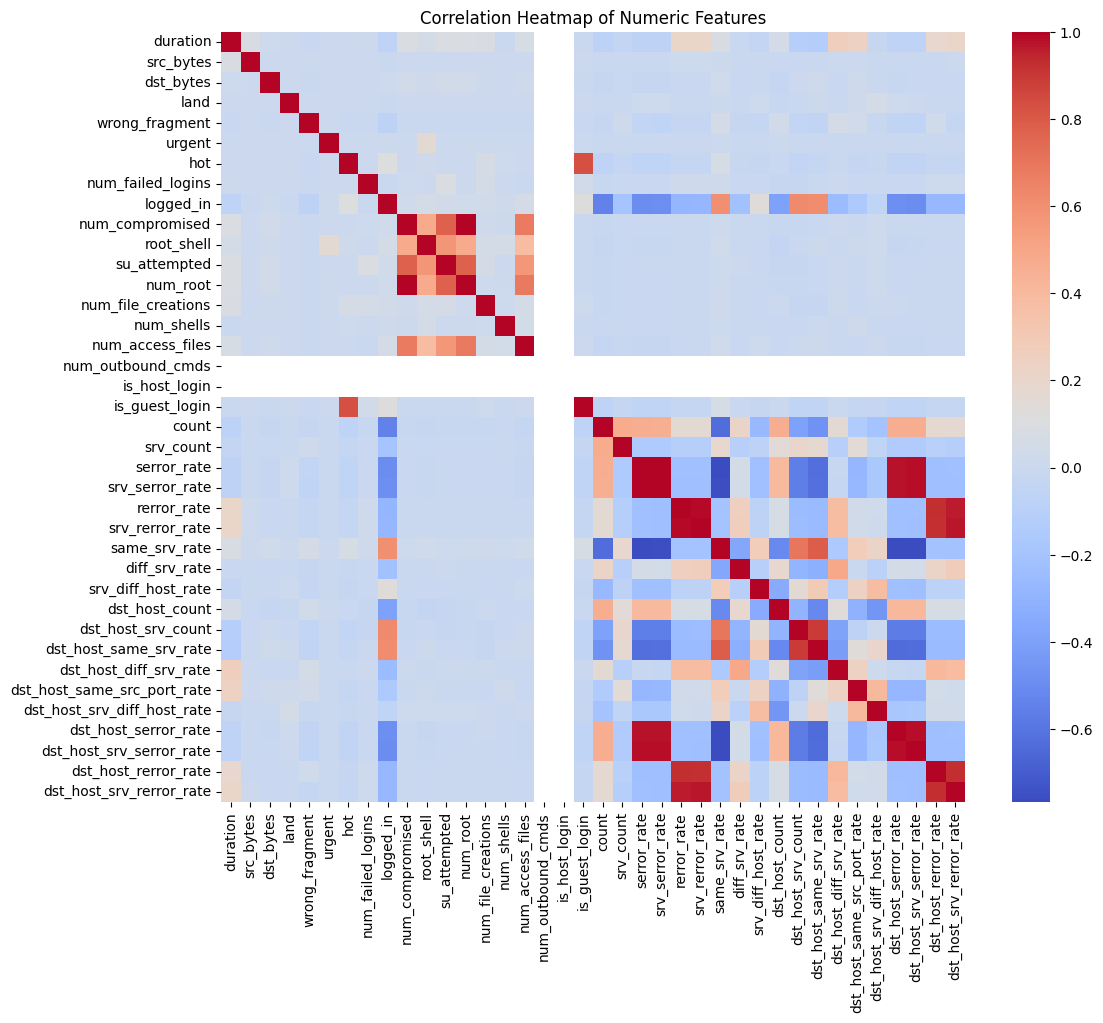

In [15]:
# Select only numeric columns
numeric_cols = traindata.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = traindata[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

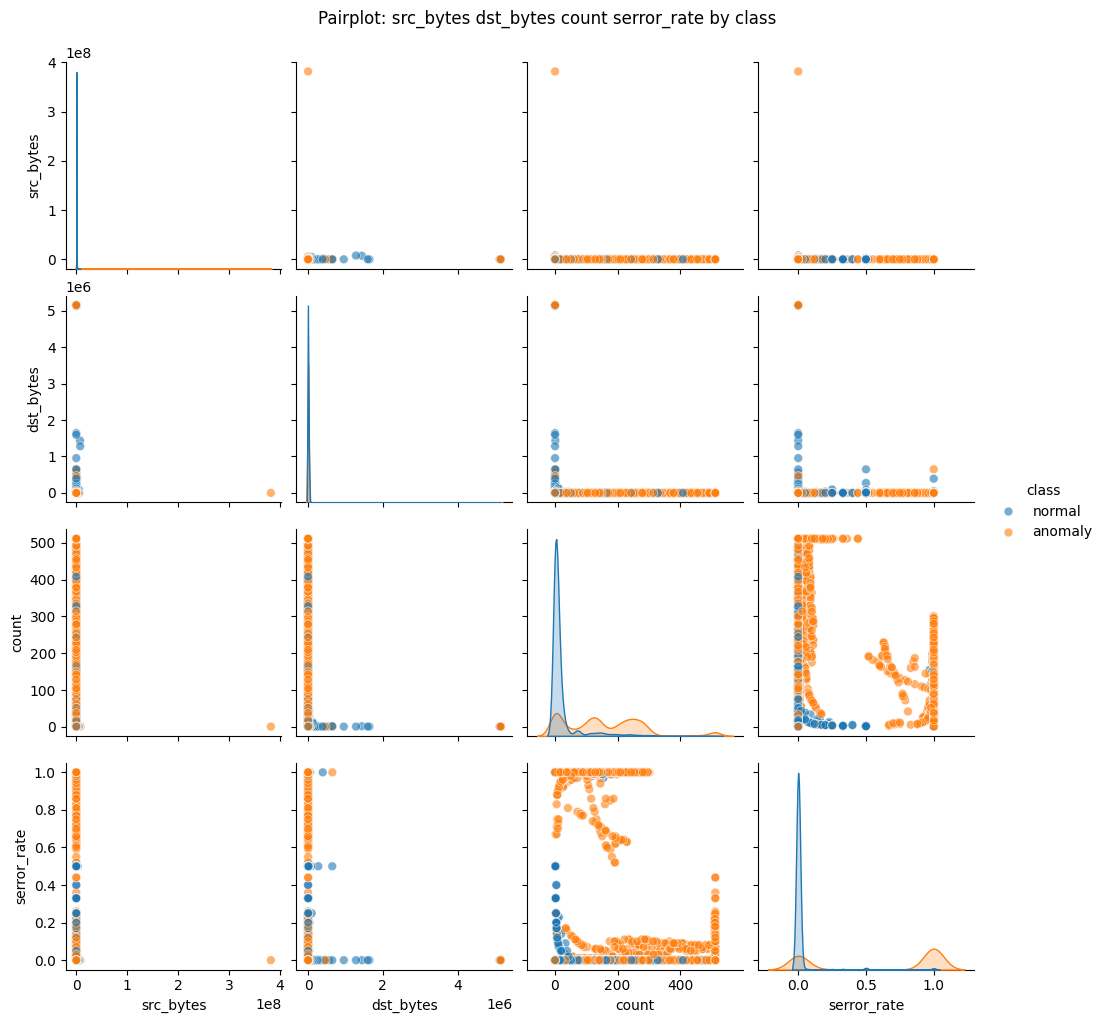

In [16]:
# Visualize pairwise relationships
selected = ['src_bytes', 'dst_bytes', 'count', 'serror_rate', 'class']
sns.pairplot(traindata[selected], hue='class', diag_kind='kde', plot_kws={'alpha':0.6, 's':40})
plt.suptitle('Pairplot: src_bytes dst_bytes count serror_rate by class', y=1.02)
plt.show()

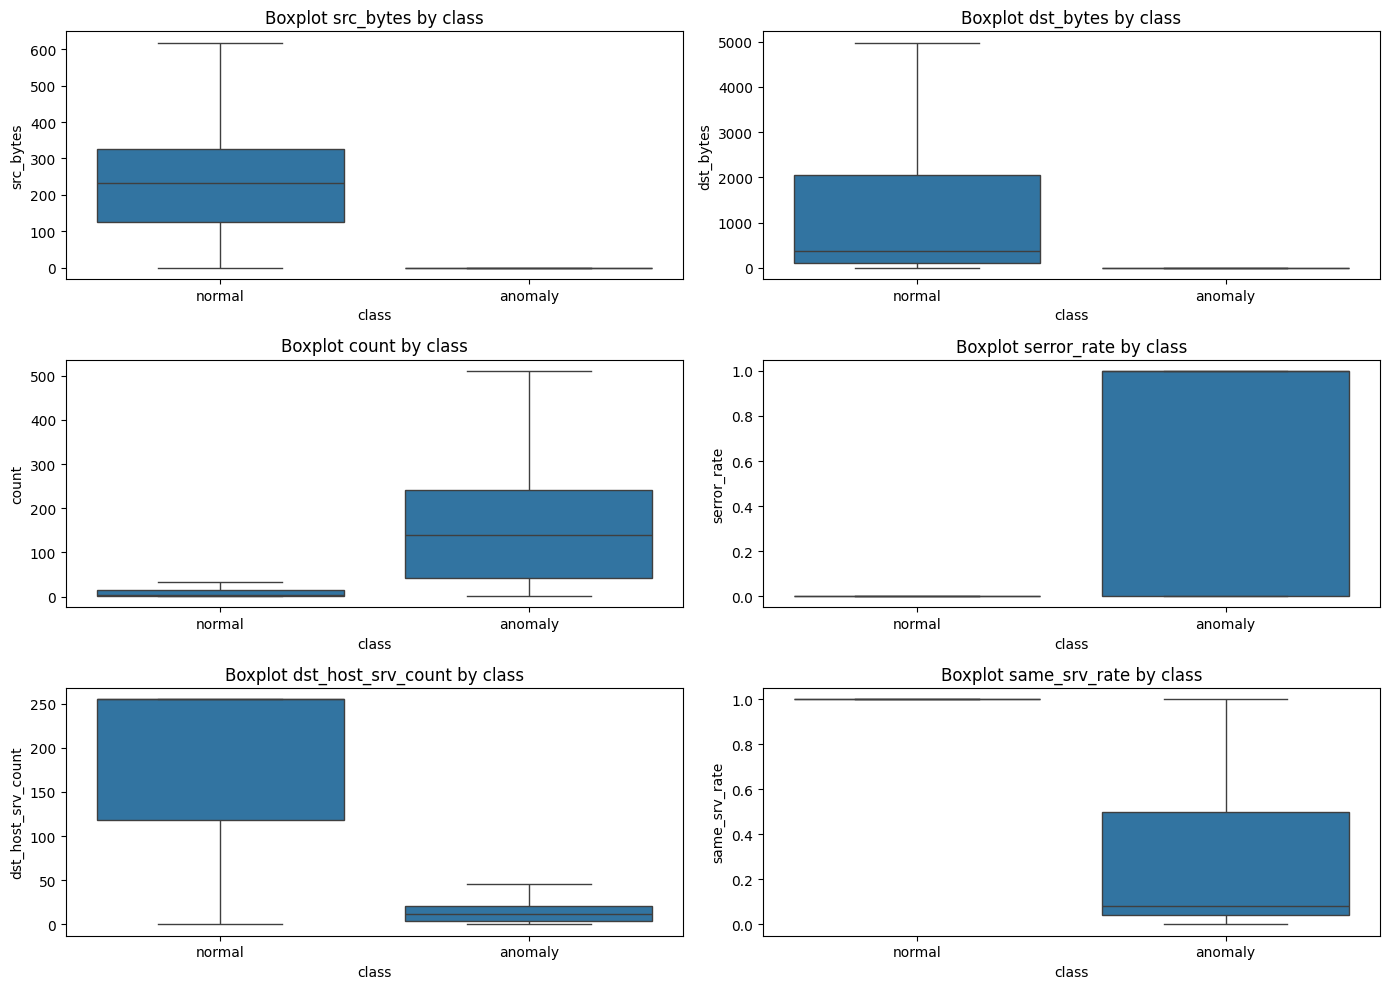

In [17]:
# Boxplots for numeric features grouped by class
num_cols = traindata.select_dtypes(include=['int64','float64']).columns.tolist()
subset = ['src_bytes','dst_bytes','count','serror_rate','dst_host_srv_count','same_srv_rate']
plt.figure(figsize=(14, 10))
for i, col in enumerate(subset, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='class', y=col, data=traindata, showfliers=False)
    plt.title(f'Boxplot {col} by class')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3414354272.py:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='class', y='src_bytes', data=traindata, scale='width', inner='quartile')
/tmp/ipython-input-3414354272.py:9: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='class', y='dst_bytes', data=traindata, scale='width', inner='quartile')


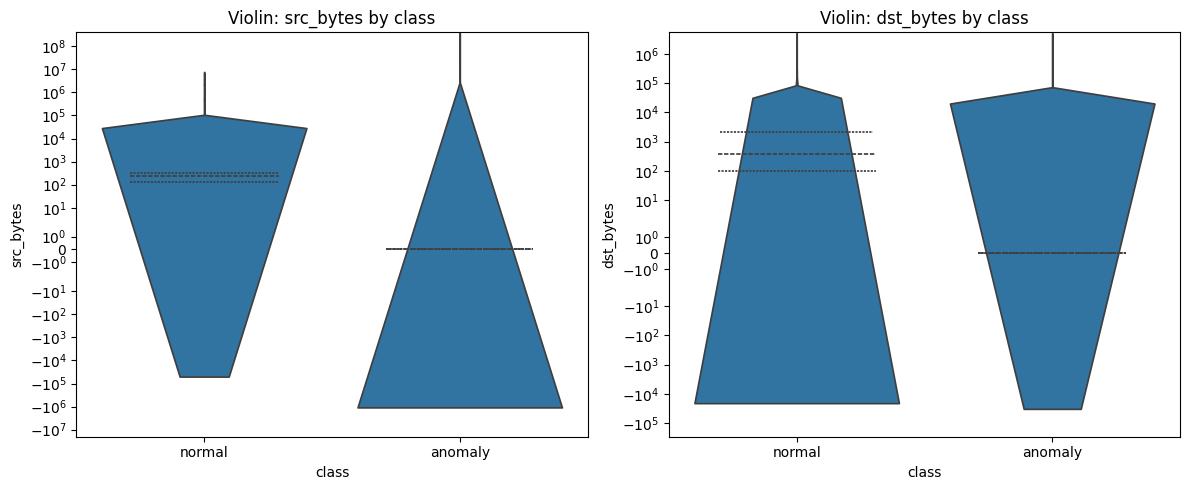

In [18]:
# Violin plots for src_bytes and dst_bytes by class
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.violinplot(x='class', y='src_bytes', data=traindata, scale='width', inner='quartile')
plt.yscale('symlog')  # handle heavy skew; use symlog or log if zeros absent
plt.title('Violin: src_bytes by class')

plt.subplot(1,2,2)
sns.violinplot(x='class', y='dst_bytes', data=traindata, scale='width', inner='quartile')
plt.yscale('symlog')
plt.title('Violin: dst_bytes by class')
plt.tight_layout()
plt.show()

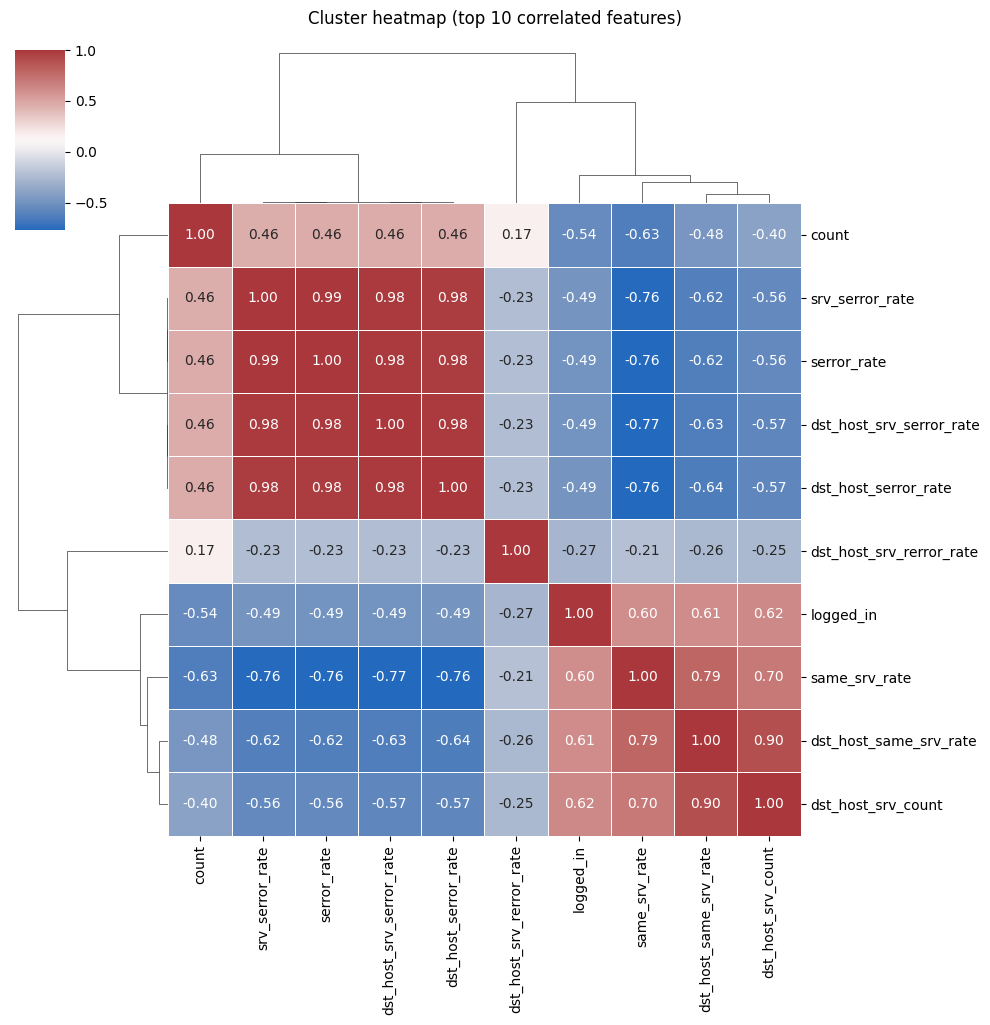

In [19]:
# correlation on numeric features
num = traindata.select_dtypes(include=['int64','float64'])
corr = num.corr().abs()

# pick top correlated features by average correlation
avg_corr = corr.mean().sort_values(ascending=False)
top10 = avg_corr.index[:10].tolist()
cm = num[top10].corr()
sns.clustermap(cm, cmap='vlag', annot=True, fmt='.2f', figsize=(10,10), linewidths=.5)
plt.suptitle('Cluster heatmap (top 10 correlated features)', y=1.02)
plt.show()

In [20]:
# Identify categorical columns that are features not the 'class' target
feature_categorical_cols = [col for col in traindata.select_dtypes(include=['object']).columns if col != 'class']

In [21]:
# Define categorical feature columns explicitly
feature_categorical_cols = ['protocol_type', 'service', 'flag']

# Encode feature categorical columns
for col in feature_categorical_cols:
    encoder = LabelEncoder()
    # Combine unique values from both train and test data for fitting the encoder
    all_unique_labels = pd.concat([traindata[col].astype(str), testdata[col].astype(str)]).unique()
    encoder.fit(all_unique_labels)

    # Transform both train and test data
    traindata[col] = encoder.transform(traindata[col].astype(str))
    if col in testdata.columns:
        testdata[col] = encoder.transform(testdata[col].astype(str))

In [22]:
# Encode the 'class' target column separately for training data
if 'class' in traindata.columns and traindata['class'].dtype == 'object':
    encoder_class = LabelEncoder()
    traindata['class'] = encoder_class.fit_transform(traindata['class'])

In [23]:
# Select numeric columns
numeric_cols = traindata.select_dtypes(include=['int64', 'float64']).columns.drop('class')
scaler = StandardScaler()
traindata[numeric_cols] = scaler.fit_transform(traindata[numeric_cols])
testdata[numeric_cols] = scaler.transform(testdata[numeric_cols])

In [24]:
# separate the features (X_train) from the target variable (y_train) in the training data
X_train = traindata.drop('class', axis=1)
y_train = traindata['class']

In [25]:
# Prepare X_test and y_test from testdata
if 'class' in testdata.columns:
    # Encode the 'class' column in testdata
    if testdata['class'].dtype == 'object':
        testdata['class'] = encoder_class.transform(testdata['class'])

    # separate 'class' column from X_test and y_test
    X_test = testdata.drop('class', axis=1)
    y_test = testdata['class']
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_test:", y_test.shape)
else:
    # If 'class' column is not in testdata
    X_test = testdata.copy()
    y_test = None # Explicitly set y_test to None to indicate it's not available from testdata
    print("Warning: 'class' column not found in testdata. X_test is the full testdata, y_test is set to None.")
    print("Shape of X_test:", X_test.shape)

Shape of X_test: (22544, 41)


In [26]:
# Print shapes of training data and testing data's subsets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (25192, 41)
Shape of y_train: (25192,)
Shape of X_test: (22544, 41)


In [27]:
# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("Shape of X_train_split:", X_train_split.shape)
print("Shape of y_train_split:", y_train_split.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train_split: (20153, 41)
Shape of y_train_split: (20153,)
Shape of X_val: (5039, 41)
Shape of y_val: (5039,)


In [28]:
# Instantiate Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [29]:
# Fit the model to the training data
log_reg.fit(X_train_split, y_train_split)

LogisticRegression(max_iter=1000, random_state=42)

In [30]:
# Make predictions on the validation set
y_pred_lr = log_reg.predict(X_val)

In [31]:
# Calculate accuracy
accuracy_lr = accuracy_score(y_val, y_pred_lr)

# Calculate precision
precision_lr = precision_score(y_val, y_pred_lr)

# Calculate recall
recall_lr = recall_score(y_val, y_pred_lr)

# Calculate F1-score
f1_lr = f1_score(y_val, y_pred_lr)

In [32]:
# Print Performance Metrices
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"Logistic Regression Recall: {recall_lr:.4f}")
print(f"Logistic Regression F1-score: {f1_lr:.4f}")

Logistic Regression Accuracy: 0.9559
Logistic Regression Precision: 0.9554
Logistic Regression Recall: 0.9619
Logistic Regression F1-score: 0.9586


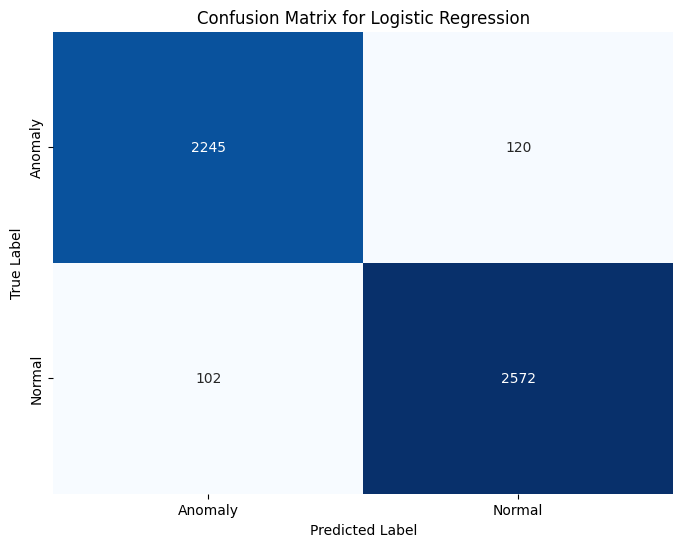

In [33]:
# Generate confusion matrix
cm_lr = confusion_matrix(y_val, y_pred_lr)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [34]:
# Instantiate Decision Tree Classifier model
dec_tree = DecisionTreeClassifier(random_state=42)

In [35]:
# Fit the model to the training data
dec_tree.fit(X_train_split, y_train_split)

DecisionTreeClassifier(random_state=42)

In [36]:
# Make predictions on the validation set
y_pred_dt = dec_tree.predict(X_val)

In [37]:
# Calculate accuracy
accuracy_dt = accuracy_score(y_val, y_pred_dt)

# Calculate precision
precision_dt = precision_score(y_val, y_pred_dt)

# Calculate recall
recall_dt = recall_score(y_val, y_pred_dt)

# Calculate F1-score
f1_dt = f1_score(y_val, y_pred_dt)

In [38]:
# Print Performance Metrices
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Classifier Precision: {precision_dt:.4f}")
print(f"Decision Tree Classifier Recall: {recall_dt:.4f}")
print(f"Decision Tree Classifier F1-score: {f1_dt:.4f}")

Decision Tree Classifier Accuracy: 0.9958
Decision Tree Classifier Precision: 0.9966
Decision Tree Classifier Recall: 0.9955
Decision Tree Classifier F1-score: 0.9961


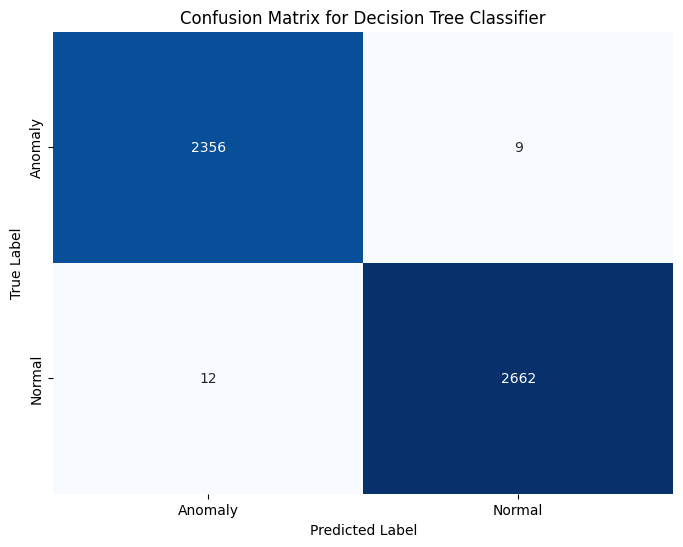

In [39]:
# Generate confusion matrix
cm_dt = confusion_matrix(y_val, y_pred_dt)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [40]:
# Instantiate Random Forest Classifier model
rand_for = RandomForestClassifier(random_state=42)

In [41]:
# Fit the model to the training data
rand_for.fit(X_train_split, y_train_split)

RandomForestClassifier(random_state=42)

In [42]:
# Make predictions on the validation set
y_pred_rf = rand_for.predict(X_val)

In [43]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_val, y_pred_rf)

# Calculate precision
precision_rf = precision_score(y_val, y_pred_rf)

# Calculate recall
recall_rf = recall_score(y_val, y_pred_rf)

# Calculate F1-score
f1_rf = f1_score(y_val, y_pred_rf)

In [44]:
# Print Performance Metrices
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Classifier Precision: {precision_rf:.4f}")
print(f"Random Forest Classifier Recall: {recall_rf:.4f}")
print(f"Random Forest Classifier F1-score: {f1_rf:.4f}")

Random Forest Classifier Accuracy: 0.9978
Random Forest Classifier Precision: 0.9974
Random Forest Classifier Recall: 0.9985
Random Forest Classifier F1-score: 0.9979


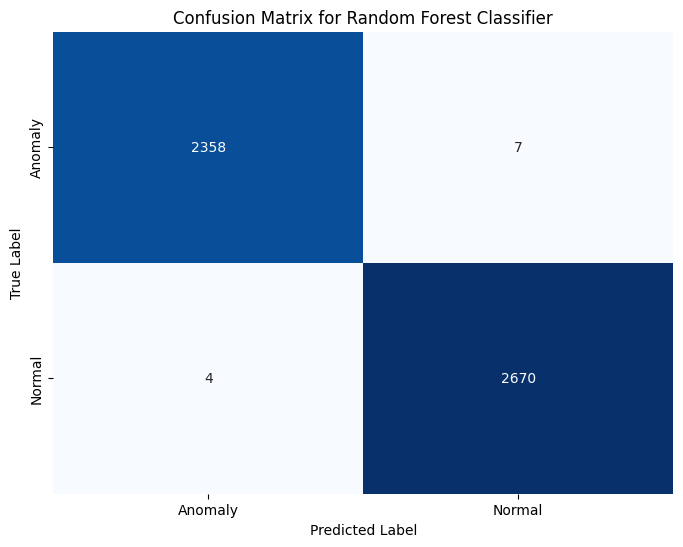

In [45]:
# Generate confusion matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [46]:
# Creating a dataframe for model names and their accuracy metrices
metrics_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf],
    'Precision': [precision_lr, precision_dt, precision_rf],
    'Recall': [recall_lr, recall_dt, recall_rf],
    'F1-score': [f1_lr, f1_dt, f1_rf]}
metrics_df = pd.DataFrame(metrics_data)

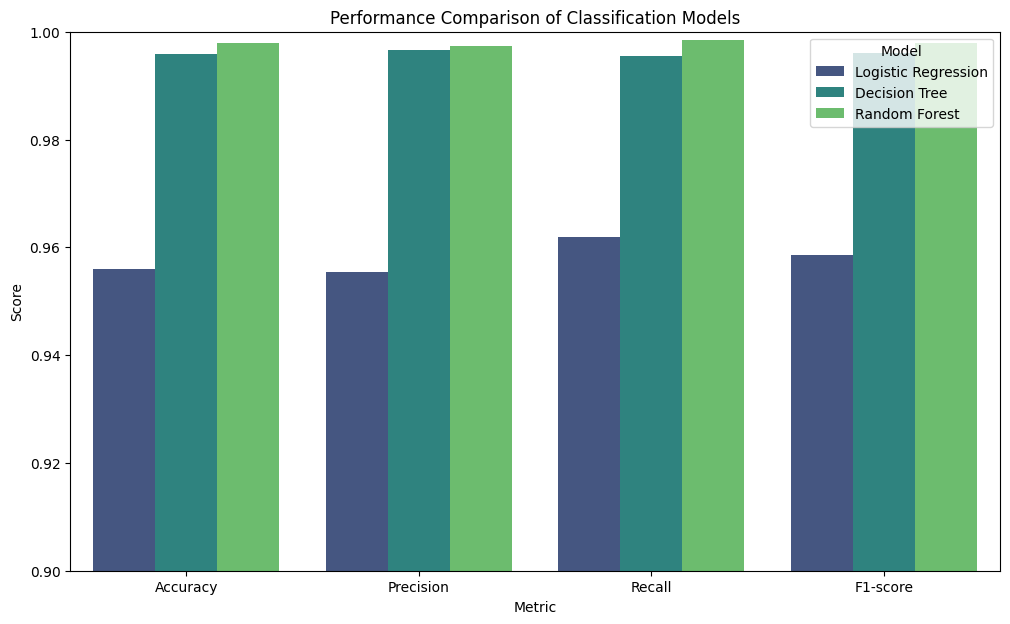

In [47]:
# Melt the DataFrame for plotting the Performance Comparison of Classification Models
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(12, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted, palette='viridis')
plt.title('Performance Comparison of Classification Models')
plt.ylabel('Score')
plt.ylim(0.9, 1.0)
plt.show()

In [48]:
# Identifying the best performing model
best_model = metrics_df.loc[metrics_df['Accuracy'].idxmax()]
print(f"The best performing model is {best_model['Model']}")

The best performing model is Random Forest


In [49]:
# Displaying Real vs predicted values using best model
real_vs_predicted = pd.DataFrame({'Real': y_val, 'Predicted': y_pred_rf})
print(f"Real vs. Predicted Values using {best_model['Model']}")
display(real_vs_predicted.head())

Real vs. Predicted Values using Random Forest


,Real,Predicted
19064,0,0
11127,1,1
6517,0,0
2973,1,1
13339,0,0
